# In this notebook I do the data analysis and the plots for the TOF TOMO paper

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
import TOF_routines
from TOF_routines import l2tof, tof2l
from TOF_routines import find_nearest
from astropy.io import fits
from matplotlib_scalebar.scalebar import ScaleBar
from brokenaxes import brokenaxes
import matplotlib.gridspec as gridspec
import AdvancedBraggEdgeFitting_v2
from sklearn.metrics import mean_squared_error

In [2]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_update\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [3]:
# I now load the images with BB correction
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [4]:
nBins=165 
spectrum_IMAT=np.zeros((512,512,nBins))
print(np.shape(spectrum_IMAT))
for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft3_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    with fits.open(filename) as f:
        spectrum_IMAT[:,:,i]=f[0].data

(512, 512, 165)


In [5]:
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Al = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)
Al_BB = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[150:200,80:130,i])
    Pb[i] = np.median(spectrum_img[50:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:130,i])
    Cu[i] = np.median(spectrum_img[130:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Al[i] = np.median(spectrum_img[280:330,330:380,i])
    Ti_BB[i] = np.median(spectrum_img_BB[150:200,80:130,i])
    Pb_BB[i] = np.median(spectrum_img_BB[50:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:130,i])
    Cu_BB[i] = np.median(spectrum_img_BB[130:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    Al_BB[i] = np.median(spectrum_img_BB[280:330,330:380,i])
    
    

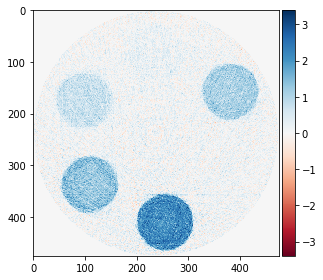

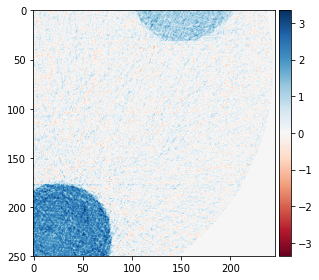

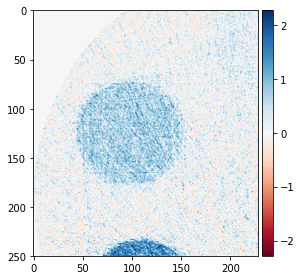

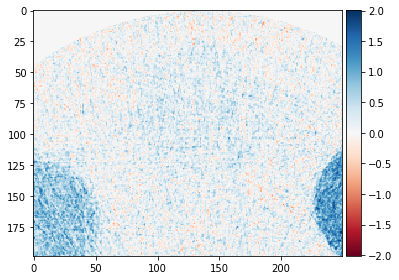

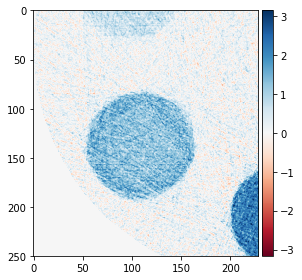

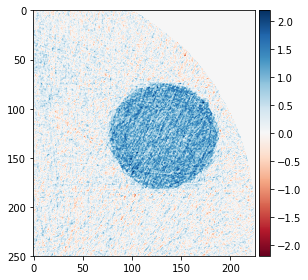

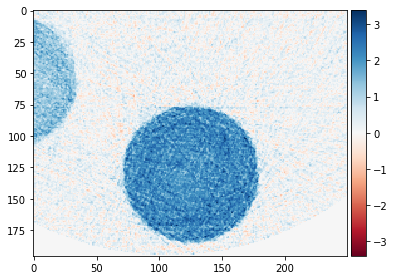

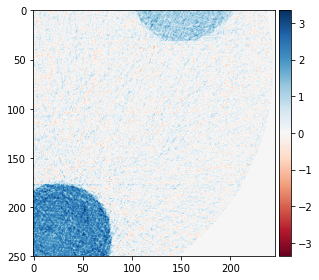

In [5]:
plt.figure()
io.imshow(spectrum_img[:,:,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

plt.figure()
io.imshow(spectrum_img[150-100:200+100,80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[50-49:100+100,200-100:250+100,100])

plt.figure()
io.imshow(spectrum_img[300-100:350+100, 80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[130-100:180+100,350-100:400+100,100])

plt.figure()
io.imshow(spectrum_img[380-100:430+100,230-100:280+100,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

In [6]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0
myLambda =tof2l(myTOF, lambda0,t0,L)
lambda_bin = myLambda[1::18]

In [7]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')
data_Al = np.genfromtxt('Al.txt')

(300, 2)


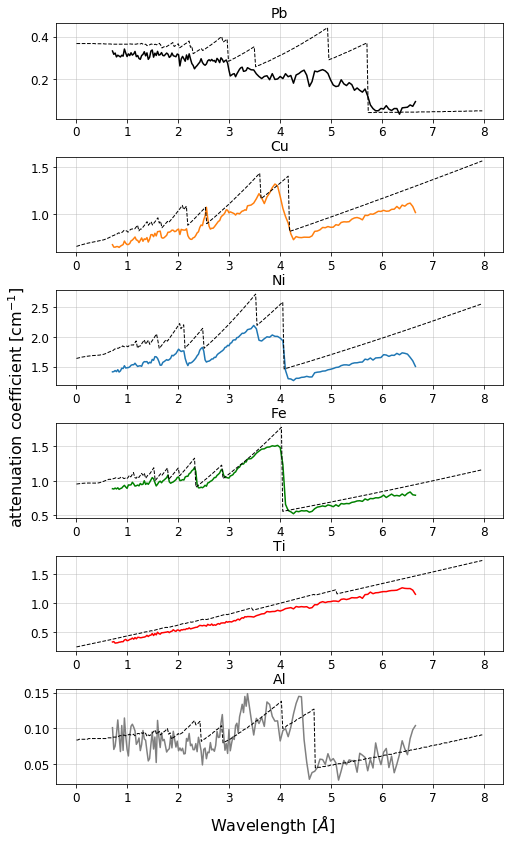

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(614)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)

# plt.savefig('spectra_plots.tiff')
plt.savefig('spectra_plots_NOBB.png', dpi=500)
# plt.savefig('spectra_plots.pdf')

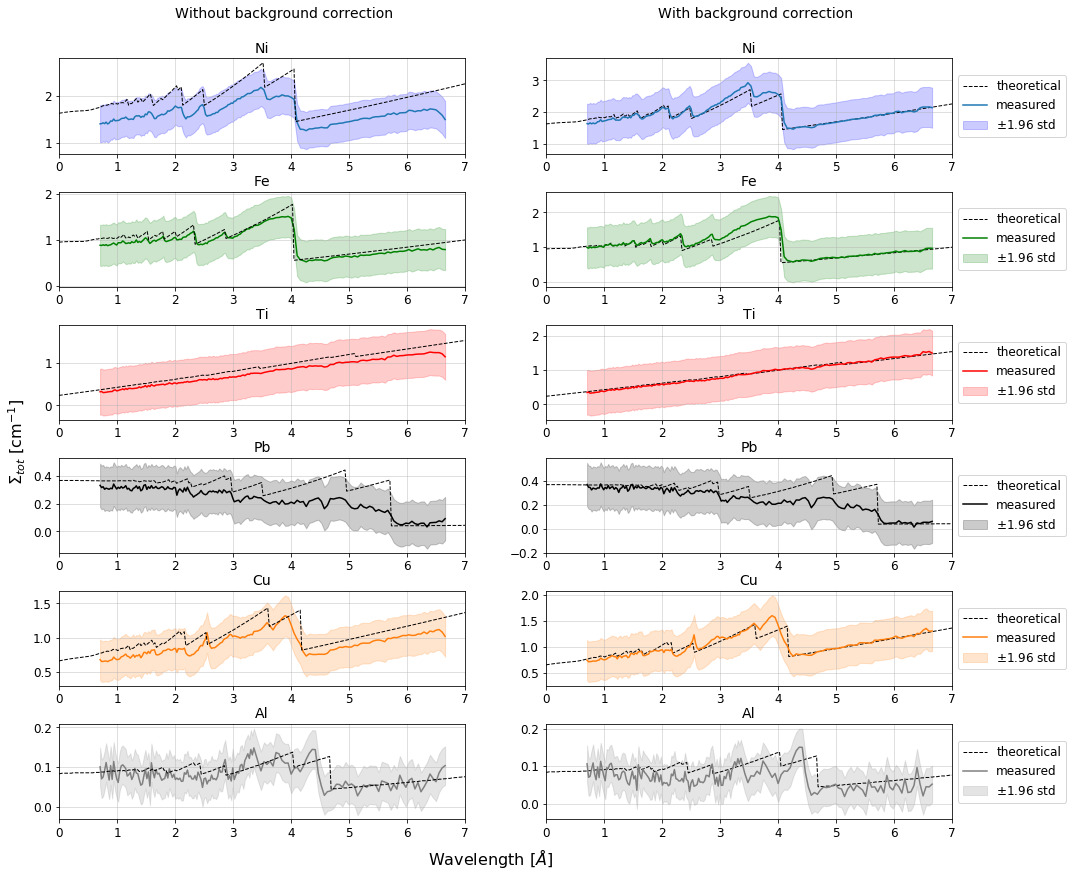

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16, 14))

plt.subplot(621)
plt.plot(lambda_bin, Ni)
plt.fill_between(lambda_bin, Ni-1.96*np.std(Ni), Ni+1.96*np.std(Ni), color='b', alpha=0.2)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax1 = plt.subplot(622)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1,label='theoretical')
plt.plot(lambda_bin, Ni_BB, label='measured')
plt.fill_between(lambda_bin, Ni_BB-1.96*np.std(Ni_BB), Ni_BB+1.96*np.std(Ni_BB), color='b', alpha=0.2, label='$\pm$1.96 std')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax2 = plt.subplot(624)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Fe_BB,'g', label='measured')
plt.fill_between(lambda_bin, Fe_BB-1.96*np.std(Fe_BB), Fe_BB+1.96*np.std(Fe_BB), color='g', alpha=0.2, label='$\pm$1.96 std')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(623)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Fe-1.96*np.std(Fe), Fe+1.96*np.std(Fe), color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax3 = plt.subplot(626)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Ti_BB,'r', label='measured')
plt.fill_between(lambda_bin, Ti_BB-1.96*np.std(Ti_BB), Ti_BB+1.96*np.std(Ti_BB), color='r', alpha=0.2, label='$\pm$1.96 std')
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(625)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti-1.96*np.std(Ti), Ti+1.96*np.std(Ti), color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax4 = plt.subplot(628)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Pb_BB, 'k', label='measured')
plt.fill_between(lambda_bin, Pb_BB-1.96*np.std(Pb_BB), Pb_BB+1.96*np.std(Pb_BB), color='k', alpha=0.2, label='$\pm$1.96 std')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(627)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Pb-1.96*np.std(Pb), Pb+1.96*np.std(Pb), color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax5 = plt.subplot(6,2,10)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Cu_BB, 'C1', label='measured')
plt.fill_between(lambda_bin, Cu_BB-1.96*np.std(Cu_BB), Cu_BB+1.96*np.std(Cu_BB), color='C1', alpha=0.2, label='$\pm$1.96 std')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplot(629)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Cu-1.96*np.std(Cu), Cu+1.96*np.std(Cu), color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])

ax6 = plt.subplot(6,2,12)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Al_BB, 'gray', label='measured')
plt.fill_between(lambda_bin, Al_BB-1.96*np.std(Al_BB), Al_BB+1.96*np.std(Al_BB), color='gray', alpha=0.2, label='$\pm$1.96 std')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


plt.subplot(6,2,11)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Al-1.96*np.std(Al), Al+1.96*np.std(Al), color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])


plt.subplots_adjust(hspace=0.4)
text_x = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
text_y = fig.text(0.08, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
title_1 = fig.text(0.32, 0.92, 'Without background correction', ha='center',fontsize=14)
title_2 = fig.text(0.73, 0.92, 'With background correction', ha='center',fontsize=14)
# plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_andNOT_dose_50x50_NEW.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text_x,text_y,title_1,title_2), bbox_inches='tight')

In [12]:
spectrum = np.zeros(nBins)
for i in range(0,nBins):
    spectrum[i] = np.median(spectrum_IMAT[:,:,i])

(165,)


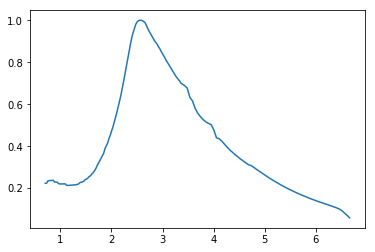

In [13]:
# Here I compensate for the different 

# plt.figure()
# plt.plot(lambda_bin,'.')
# plt.figure()
# plt.plot(lambda_bin, spectrum)

spectrum_proc = np.zeros(nBins)

for i in range(0,nBins):
    
    if i<101:
        spectrum_proc[i] = spectrum[i]
    else:
        spectrum_proc[i] = spectrum[i]/2.0


print(np.shape(spectrum_proc))

spectrum_proc[101] = (spectrum_proc[100]+spectrum_proc[102])/2

plt.figure()
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc))

In [14]:
# Expected Attenuation coefficients for the white beam tomo
spectrum_norm = spectrum_proc/np.max(spectrum_proc)
data_Ti[:,1]
pos1 = find_nearest(data_Ti[:,0], 0.7)
pos2 = find_nearest(data_Ti[:,0], 6.7)
print(pos1,pos2)

att_Ti = 0
att_Ni = 0
att_Fe = 0
att_Pb = 0
att_Cu = 0
att_Al = 0

for i in range(0, nBins):
    pos = find_nearest(data_Ti[:,0], lambda_bin[i])
    att_Ti += data_Ti[pos,1]*spectrum_norm[i]
    att_Ni += data_Ni[pos,1]*spectrum_norm[i]
    att_Fe += data_Fe[pos,1]*spectrum_norm[i]
    att_Pb += data_Pb[pos,1]*spectrum_norm[i]
    att_Cu += data_Cu[pos,1]*spectrum_norm[i]
    att_Al += data_Al[pos,1]*spectrum_norm[i]

print(att_Ti)
print('Ti: ', att_Ti/np.sum(spectrum_norm))
print('Ni: ', att_Ni/np.sum(spectrum_norm))
print('Fe: ', att_Fe/np.sum(spectrum_norm))
print('Cu: ', att_Cu/np.sum(spectrum_norm))
print('Pb: ', att_Pb/np.sum(spectrum_norm))
print('Al: ', att_Al/np.sum(spectrum_norm))
# print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))
# print(np.sum(Ti)/len(Ti))
# print(np.sum(Ti_BB)/len(Ti_BB))

# print(np.sum(data_Ti[pos1:pos2,1]*spectrum_norm)/(pos2-pos1))



26 251
59.195116405288694
Ti:  0.7949814877299375
Ni:  2.0409283754694316
Fe:  1.0913524126970093
Cu:  1.0438253813650962
Pb:  0.33589624663664336
Al:  0.09362607613759212


In [15]:
print(np.sum(Ti_BB)/len(Ti_BB))
print(np.sum(Ti)/len(Ti))
print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))

0.8173613744251655
0.7114324840632352
0.9295688888888889


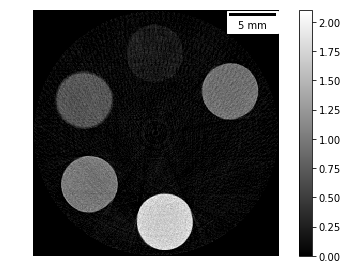

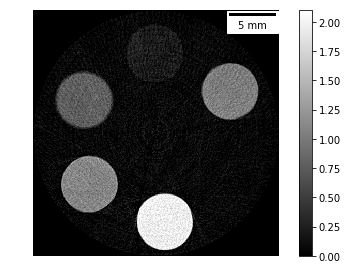

In [16]:
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam\slice_0405.tif')
img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected\slice_0405.tif')

plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)


scalebar = ScaleBar(0.000055) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('WhiteBeam.png', dpi=600) # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)
scalebar2 = ScaleBar(0.000055) 
plt.gca().add_artist(scalebar2)
plt.tight_layout()
plt.savefig('WhiteBeam_BB.png', dpi=600) # This is also to be updated as i
plt.savefig('WhiteBeam_BB.pdf')

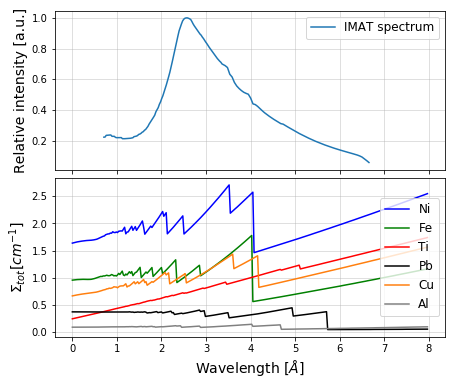

In [17]:
plt.subplots(figsize=(7,6))
ax1 = plt.subplot(211)
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc), label='IMAT spectrum')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Relative intensity [a.u.]', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(data_Ni[:,0], data_Ni[:,1], c='b', label='Ni')
plt.plot(data_Fe[:,0], data_Fe[:,1], c='g', label='Fe')
plt.plot(data_Ti[:,0], data_Ti[:,1], c='r', label='Ti')
plt.plot(data_Pb[:,0], data_Pb[:,1], c='k', label='Pb')
plt.plot(data_Cu[:,0], data_Cu[:,1], c='C1',label='Cu')
plt.plot(data_Al[:,0], data_Al[:,1], c='gray', label='Al')
plt.grid(alpha=0.5)
plt.legend(loc='right', fontsize=12)

plt.xlabel('Wavelength [$\AA$]', fontsize=14)
plt.ylabel('$\Sigma_{tot}$[$cm^{-1}$]', fontsize=14)
plt.subplots_adjust(hspace=0.05)

plt.savefig('IMAT_spectrum_And_Thoretical.png', dpi=600)

### Analysis voxel-based for the paper 

In [9]:
Ti_BB_image = spectrum_img_BB[150:200,80:130,:]
Pb_BB_image = spectrum_img_BB[50:100,200:250,:]
Fe_BB_image = spectrum_img_BB[300:350, 80:130,:]
Cu_BB_image = spectrum_img_BB[130:180,350:400,:]
Ni_BB_image = spectrum_img_BB[380:430,230:280,:]
Al_BB_image = spectrum_img_BB[280:330,330:380,:]

(50, 50, 165)
[0.71 1.23 1.77 2.29 2.81 3.33 4.37 5.41 6.45]


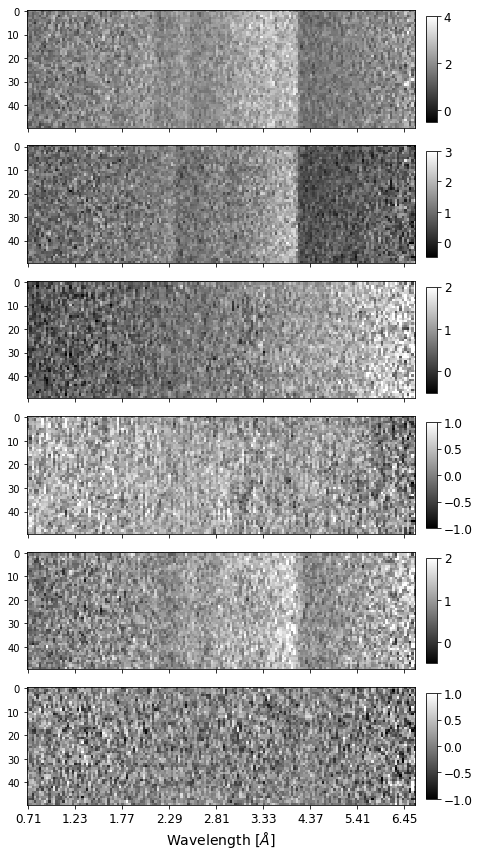

In [311]:
print(np.shape(Ti_BB_image))

fig, axes = plt.subplots(6,figsize=(8,12),sharex=True, sharey=True)

c1 = axes[0].imshow(Ni_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=4.0)
cb = fig.colorbar(c1, ax=axes[0], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c2 = axes[1].imshow(Fe_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=3.0)
cb=fig.colorbar(c2, ax=axes[1], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c3=axes[2].imshow(Ti_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c3, ax=axes[2], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c4=axes[3].imshow(Pb_BB_image[:,25,:], cmap='gray', vmin=-1.0, vmax=1.0)
cb=fig.colorbar(c4, ax=axes[3], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c5=axes[4].imshow(Cu_BB_image[:,25,:], cmap='gray', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c5, ax=axes[4], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c6=axes[5].imshow(Al_BB_image[:,25,:], cmap='gray', vmin=-1.0, vmax=1.0)
cb=fig.colorbar(c6, ax=axes[5], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

mylabels=np.round(lambda_bin[0::20],2)
axes[5].set_xticklabels([0.71, 0.71, 1.23, 1.77, 2.29, 2.81, 3.33, 4.37, 5.41, 6.45], fontsize=12)
# plt.subplots_adjust(wspace=0.005) # non cambia un cazzo
axes[5].set_xlabel('Wavelength [$\AA$]', fontsize=14)
# fig.text(0.04, 0.5, 'Pixel position', va='center', rotation='vertical', fontsize=14)

fig.tight_layout()
print(np.round(lambda_bin[0::20],2))
# plt.savefig('energy_slice_viridis.pdf')
plt.savefig('energy_slice_gray.pdf')


In [11]:
Ni5x5 = np.zeros(nBins)
Fe5x5 = np.zeros(nBins)
Ti5x5 = np.zeros(nBins)
Pb5x5 = np.zeros(nBins)
Cu5x5 = np.zeros(nBins)
Al5x5 = np.zeros(nBins)

for i in range(0, nBins):

    Ni5x5[i] = np.median(Ni_BB_image[23:28,23:28,i])
    Fe5x5[i] = np.median(Fe_BB_image[23:28,23:28,i])
    Ti5x5[i] = np.median(Ti_BB_image[23:28,23:28,i])
    Pb5x5[i] = np.median(Pb_BB_image[23:28,23:28,i])
    Cu5x5[i] = np.median(Cu_BB_image[23:28,23:28,i])
    Al5x5[i] = np.median(Al_BB_image[23:28,23:28,i])

print(np.shape(Ni_BB_image[20:30,20:30,i]))


(10, 10)


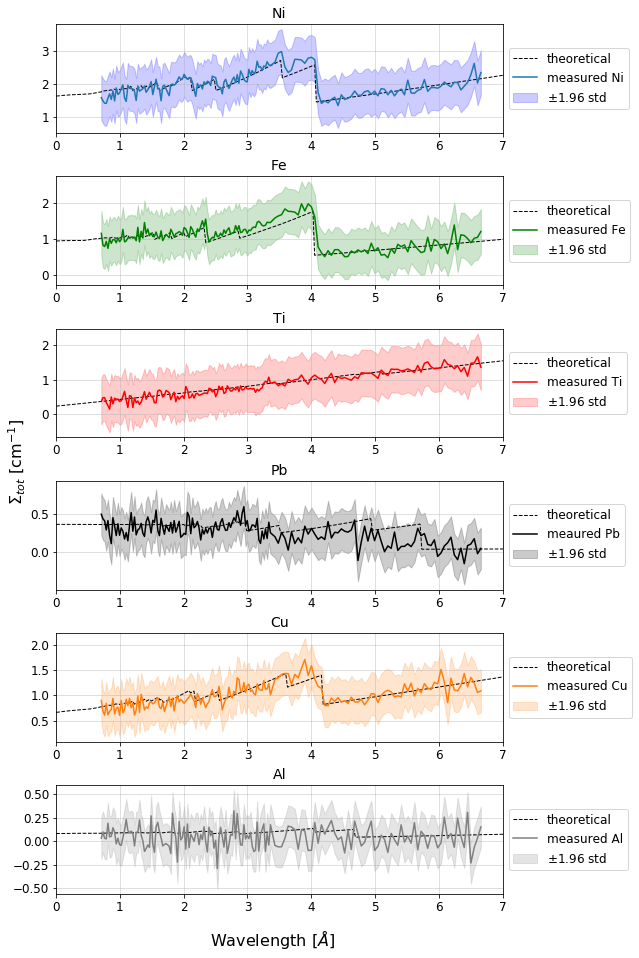

In [283]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 16))

ax1 = plt.subplot(611)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Ni5x5, label='measured Ni')
plt.fill_between(lambda_bin, Ni5x5-1.96*np.std(Ni5x5), Ni5x5+1.96*np.std(Ni5x5), color='b', alpha=0.2, label='$\pm$1.96 std')
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)



ax2 = plt.subplot(612)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Fe5x5,'g', label='measured Fe')
plt.fill_between(lambda_bin, Fe5x5-1.96*np.std(Fe5x5), Fe5x5+1.96*np.std(Fe5x5), color='g', alpha=0.2, label='$\pm$1.96 std')
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax3=plt.subplot(613)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1,label='theoretical' )
plt.plot(lambda_bin, Ti5x5,'r', label='measured Ti')
plt.fill_between(lambda_bin, Ti5x5-1.96*np.std(Ti5x5), Ti5x5+1.96*np.std(Ti5x5), color='r', alpha=0.2,label='$\pm$1.96 std')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Ti', fontsize=14)
plt.xlim([0,7])
lg3 = ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax4=plt.subplot(614)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1,label='theoretical')
plt.plot(lambda_bin, Pb5x5, 'k', label='meaured Pb')
plt.fill_between(lambda_bin, Pb5x5-1.96*np.std(Pb5x5), Pb5x5+1.96*np.std(Pb5x5), color='k', alpha=0.2, label='$\pm$1.96 std')
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg4 = ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax5=plt.subplot(615)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Cu5x5, 'C1', label='measured Cu')
plt.fill_between(lambda_bin, Cu5x5-1.96*np.std(Cu5x5), Cu5x5+1.96*np.std(Cu5x5), color='C1', alpha=0.2, label='$\pm$1.96 std')
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg5 = ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax6=plt.subplot(616)
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1, label='theoretical')
plt.plot(lambda_bin, Al5x5, 'gray', label='measured Al')
plt.fill_between(lambda_bin, Al5x5-1.96*np.std(Al5x5), Al5x5+1.96*np.std(Al5x5), color='gray', alpha=0.2, label='$\pm$1.96 std')
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
lg6 = ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.subplots_adjust(hspace=0.4)
text = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
# plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_dose_10x10.pdf',bbox_extra_artists=(lg1,lg2,lg3,lg4,lg5,lg6, text), bbox_inches='tight')
# plt.savefig('spectra_plots_BB_dose_5x5.png', dpi=600)

In [289]:
resampled_Ni = np.interp(lambda_bin, data_Ni[:,0], data_Ni[:,1])
resampled_Fe = np.interp(lambda_bin, data_Fe[:,0], data_Fe[:,1])
resampled_Ti = np.interp(lambda_bin, data_Ti[:,0], data_Ti[:,1])
resampled_Pb = np.interp(lambda_bin, data_Pb[:,0], data_Pb[:,1])
resampled_Cu = np.interp(lambda_bin, data_Cu[:,0], data_Cu[:,1])
resampled_Al = np.interp(lambda_bin, data_Al[:,0], data_Al[:,1])

#RMSE OF THESE, it is probably not a good metric, as it depends on the scale of the data, and it is sensitive to outliers

rms_Ni = np.sqrt(mean_squared_error(resampled_Ni, Ni5x5))
rms_Fe = np.sqrt(mean_squared_error(resampled_Fe, Fe5x5))
rms_Ti = np.sqrt(mean_squared_error(resampled_Ti, Ti5x5))
rms_Pb = np.sqrt(mean_squared_error(resampled_Pb, Pb5x5))
rms_Cu = np.sqrt(mean_squared_error(resampled_Cu, Cu5x5))
rms_Al = np.sqrt(mean_squared_error(resampled_Al, Al5x5)) 
print(rms_Ni, rms_Fe, rms_Ti, rms_Pb, rms_Cu, rms_Al)

0.16567467175206232 0.18083773314871615 0.10945824972703277 0.12862126850582176 0.13311026518446092 0.12038182921010776


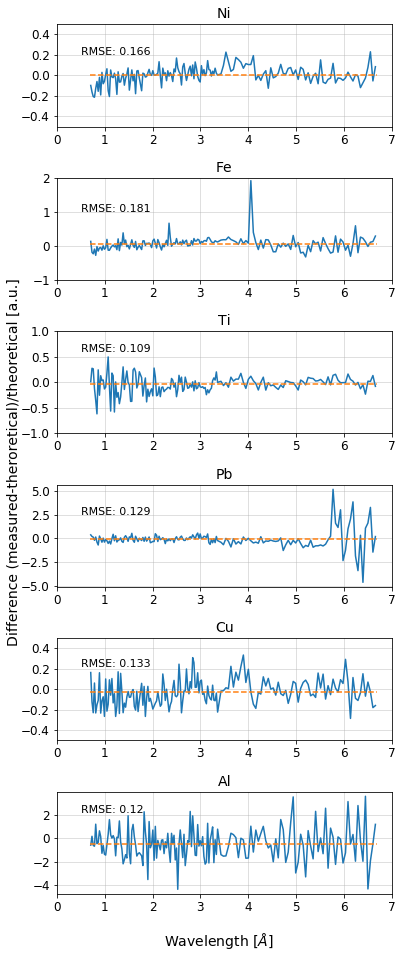

In [307]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(6, 16))

ax1 = plt.subplot(611)
diff_Ni = (Ni5x5-resampled_Ni)/resampled_Ni
plt.plot(lambda_bin, diff_Ni)
plt.plot([0.7, 6.7],[np.average(diff_Ni), np.average(diff_Ni)],'--')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.ylim([-0.5,0.5])
plt.title('Ni', fontsize=14)
plt.text(0.5,0.2, 'RMSE: '+ str(round(rms_Ni,3)), fontsize=11)


ax2=plt.subplot(612)

diff_Fe = (Fe5x5-resampled_Fe)/resampled_Fe
plt.plot(lambda_bin, diff_Fe)
plt.plot([0.7, 6.7],[np.average(diff_Fe), np.average(diff_Fe)],'--')
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.title('Fe', fontsize=14)
plt.text(0.5,1.0, 'RMSE: '+ str(round(rms_Fe,3)), fontsize=11)
plt.ylim([-1,2])

ax3 = plt.subplot(613)

plt.title('Ti', fontsize=14)

diff_Ti = (Ti5x5-resampled_Ti)/resampled_Ti
plt.plot(lambda_bin, diff_Ti)
plt.plot([0.7,6.7],[np.average(diff_Ti),np.average(diff_Ti)],'--')
plt.grid(alpha=0.5)
plt.text(0.5,0.6, 'RMSE: '+ str(round(rms_Ti,3)), fontsize=11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.ylim([-1,1])


ax4 = plt.subplot(614)
plt.title('Pb', fontsize=14)
diff_Pb = (Pb5x5-resampled_Pb)/resampled_Pb
plt.plot(lambda_bin, diff_Pb, label='difference')
plt.plot([0.7,6.7],[np.average(diff_Pb), np.average(diff_Pb)],'--')
plt.text(0.5,2.5, 'RMSE: '+ str(round(rms_Pb,3)), fontsize=11)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
# plt.ylim([-2,4])


ax5 = plt.subplot(615)
plt.title('Cu', fontsize=14)
diff_Cu = (Cu5x5-resampled_Cu)/resampled_Cu
plt.plot(lambda_bin, diff_Cu, label='difference')
plt.plot([0.7,6.7],[np.average(diff_Cu), np.average(diff_Cu)],'--')
plt.text(0.5,0.22, 'RMSE: '+ str(round(rms_Cu,3)), fontsize=11)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
plt.ylim([-0.5,0.5])

ax6 = plt.subplot(616)
plt.grid(alpha=0.5)
plt.title('Al', fontsize=14)
diff_Al = (Al5x5-resampled_Al)/resampled_Al
plt.plot(lambda_bin, diff_Al, label='difference')
plt.plot([0.7,6.7],[np.average(diff_Al), np.average(diff_Al)],'--')
plt.text(0.5,2.1, 'RMSE: '+ str(round(rms_Al,3)), fontsize=11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,7])
# plt.ylim([-4,4])

plt.subplots_adjust(hspace=0.5)
text1 = fig.text(0.5, 0.08, 'Wavelength [$\AA$]', ha='center',fontsize=14)
text2 = fig.text(0.01, 0.5, 'Difference (measured-theroretical)/theoretical [a.u.]', va='center', rotation='vertical', fontsize=14)
plt.savefig('Difference_spectra.pdf',bbox_extra_artists=(text1, text2), bbox_inches='tight')


## SNR analysis 

In [282]:
timesteps=50
Ti_av = np.zeros([timesteps, nBins])
Fe_av = np.zeros([timesteps, nBins])
Cu_av = np.zeros([timesteps, nBins])
Pb_av = np.zeros([timesteps, nBins])
Ni_av = np.zeros([timesteps, nBins])
Al_av = np.zeros([timesteps, nBins])

num_pixels= np.zeros(timesteps)


for j in range(0, nBins):
    curr_x1=25
    curr_x2=25
    curr_y1=25
    curr_y2=25
    for i in range(1,timesteps):
        if i % 2 == 0: #Even
            curr_x2=curr_x2+1
            curr_y2=curr_y2+1
        else: #Odd
            curr_x1 = curr_x1-1
            curr_y1 = curr_y1-1
        
        Ti_av[i,j] = np.median(Ti_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Fe_av[i,j] = np.median(Fe_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Cu_av[i,j] = np.median(Cu_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Pb_av[i,j] = np.median(Pb_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Ni_av[i,j] = np.median(Ni_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        Al_av[i,j] = np.median(Al_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])
        
        if j==0:
            num_pixels[i] = np.size(Ti_BB_image[curr_x1:curr_x2,curr_y1:curr_y2,j])

print(num_pixels)

[0.000e+00 1.000e+00 4.000e+00 9.000e+00 1.600e+01 2.500e+01 3.600e+01
 4.900e+01 6.400e+01 8.100e+01 1.000e+02 1.210e+02 1.440e+02 1.690e+02
 1.960e+02 2.250e+02 2.560e+02 2.890e+02 3.240e+02 3.610e+02 4.000e+02
 4.410e+02 4.840e+02 5.290e+02 5.760e+02 6.250e+02 6.760e+02 7.290e+02
 7.840e+02 8.410e+02 9.000e+02 9.610e+02 1.024e+03 1.089e+03 1.156e+03
 1.225e+03 1.296e+03 1.369e+03 1.444e+03 1.521e+03 1.600e+03 1.681e+03
 1.764e+03 1.849e+03 1.936e+03 2.025e+03 2.116e+03 2.209e+03 2.304e+03
 2.401e+03]


In [202]:
# num_pixels= np.zeros(timesteps)
SNR_Ti = np.zeros(timesteps)
SNR_Fe = np.zeros(timesteps)
SNR_Cu = np.zeros(timesteps)
SNR_Pb = np.zeros(timesteps)
SNR_Ni = np.zeros(timesteps)
SNR_Al = np.zeros(timesteps)

for i in range(1,timesteps):
    SNR_Ti[i] = np.mean(Ti_av[i,:])/np.std(Ti_av[i,:])
    SNR_Fe[i] = np.mean(Fe_av[i,:])/np.std(Fe_av[i,:])
    SNR_Cu[i] = np.mean(Cu_av[i,:])/np.std(Cu_av[i,:])
    SNR_Pb[i] = np.mean(Pb_av[i,:])/np.std(Pb_av[i,:])
    SNR_Ni[i] = np.mean(Ni_av[i,:])/np.std(Ni_av[i,:])
    SNR_Al[i] = np.mean(Al_av[i,:]/np.std(Al_av[i,:]))
#     num_pixels[i] = np.size(Ti_4D[1:1+i,35,100,0])

9.0 9.0
625.0 961.0 1600.0


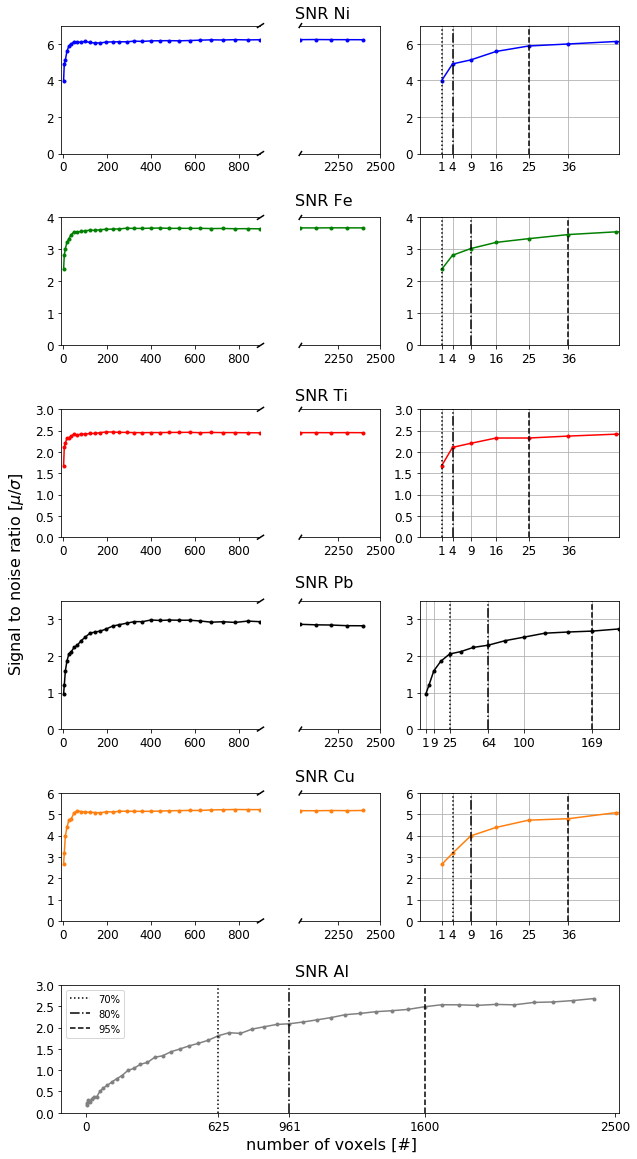

In [376]:
FE_ratio = SNR_Fe/np.mean(SNR_Fe[45:50])
Ni_ratio = SNR_Ni/np.mean(SNR_Ni[45:50])
Ti_ratio = SNR_Ti/np.mean(SNR_Ti[45:50])
Cu_ratio = SNR_Cu/np.mean(SNR_Cu[45:50])
Pb_ratio = SNR_Pb/np.mean(SNR_Pb[45:50])
Al_ratio = SNR_Al/np.mean(SNR_Al[45:50])

pos_Fe_70 = TOF_routines.find_nearest(FE_ratio, 0.7)
pos_Ni_70 = TOF_routines.find_nearest(Ni_ratio, 0.7)
pos_Ti_70 = TOF_routines.find_nearest(Ti_ratio, 0.7)
pos_Cu_70 = TOF_routines.find_nearest(Cu_ratio, 0.7)
pos_Pb_70 = TOF_routines.find_nearest(Pb_ratio, 0.7)
pos_Al_70 = TOF_routines.find_nearest(Al_ratio, 0.7)

pos_Fe_80 = TOF_routines.find_nearest(FE_ratio, 0.8)
pos_Ni_80 = TOF_routines.find_nearest(Ni_ratio, 0.8)
pos_Ti_80 = TOF_routines.find_nearest(Ti_ratio, 0.8)
pos_Cu_80 = TOF_routines.find_nearest(Cu_ratio, 0.8)
pos_Pb_80 = TOF_routines.find_nearest(Pb_ratio, 0.8)
pos_Al_80 = TOF_routines.find_nearest(Al_ratio, 0.8)

pos_Fe_95 = TOF_routines.find_nearest(FE_ratio, 0.95)
pos_Ni_95 = TOF_routines.find_nearest(Ni_ratio, 0.95)
pos_Ti_95 = TOF_routines.find_nearest(Ti_ratio, 0.95)
pos_Cu_95 = TOF_routines.find_nearest(Cu_ratio, 0.95)
pos_Pb_95 = TOF_routines.find_nearest(Pb_ratio, 0.95)
pos_Al_95 = TOF_routines.find_nearest(Al_ratio, 0.95)



fig = plt.figure(figsize=(10, 20))
gs = fig.add_gridspec(6,5)
ax = fig.add_subplot(gs[0, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[0, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[0,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Ni[1:],'.-',color='b')
ax2.plot(num_pixels[1:], SNR_Ni[1:],'.-',color='b')
ax3.plot(num_pixels[1:], SNR_Ni[1:],'.-',color='b')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,7])
ax2.set_ylim([0,7])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Ni_70],num_pixels[pos_Ni_70]]), np.array([np.min(SNR_Ni), 7]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_80],num_pixels[pos_Ni_80]]), np.array([np.min(SNR_Ni), 7]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ni_95],num_pixels[pos_Ni_95]]), np.array([np.min(SNR_Ni), 7]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,7])
ax3.grid()

fig.text(0.45,0.885,'SNR Ni',fontsize=16)



ax = fig.add_subplot(gs[1, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[1, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[1,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Fe[1:],'.-',color='g')
ax2.plot(num_pixels[1:], SNR_Fe[1:],'.-',color='g')
ax3.plot(num_pixels[1:], SNR_Fe[1:],'.-',color='g')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,4])
ax2.set_ylim([0,4])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Fe_70],num_pixels[pos_Fe_70]]), np.array([np.min(SNR_Fe), 4]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_80],num_pixels[pos_Fe_80]]), np.array([np.min(SNR_Fe), 4]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Fe_95],num_pixels[pos_Fe_95]]), np.array([np.min(SNR_Fe), 4]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,4])
ax3.grid()

fig.text(0.45,0.755,'SNR Fe',fontsize=16)

ax = fig.add_subplot(gs[2, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[2, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[2,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Ti[1:],'.-',color='r')
ax2.plot(num_pixels[1:], SNR_Ti[1:],'.-',color='r')
ax3.plot(num_pixels[1:], SNR_Ti[1:],'.-',color='r')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3])
ax2.set_ylim([0,3])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Ti_70],num_pixels[pos_Ti_70]]), np.array([np.min(SNR_Ti), 3]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_80],num_pixels[pos_Ti_80]]), np.array([np.min(SNR_Ti), 3]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Ti_95],num_pixels[pos_Ti_95]]), np.array([np.min(SNR_Ti), 3]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,3])
ax3.grid()

fig.text(0.45,0.62,'SNR Ti',fontsize=16)


ax = fig.add_subplot(gs[3, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[3, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[3,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Pb[1:],'.-',color='k')
ax2.plot(num_pixels[1:], SNR_Pb[1:],'.-',color='k')
ax3.plot(num_pixels[1:], SNR_Pb[1:],'.-',color='k')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,196)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,3.5])
ax2.set_ylim([0,3.5])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([num_pixels[pos_Pb_70],num_pixels[pos_Pb_70]]), np.array([np.min(SNR_Pb), 3.5]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_80],num_pixels[pos_Pb_80]]), np.array([np.min(SNR_Pb), 3.5]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Pb_95],num_pixels[pos_Pb_95]]), np.array([np.min(SNR_Pb), 3.5]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks([1,9,25,64,100,169])
ax3.set_ylim([0,3.5])
ax3.grid()

fig.text(0.45,0.49,'SNR Pb',fontsize=16)

ax = fig.add_subplot(gs[4, 0:2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_subplot(gs[4, 2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3 = fig.add_subplot(gs[4,3:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.plot(num_pixels[1:], SNR_Cu[1:],'.-',color='C1')
ax2.plot(num_pixels[1:], SNR_Cu[1:],'.-',color='C1')
ax3.plot(num_pixels[1:], SNR_Cu[1:],'.-',color='C1')
ax.set_xlim(-10,900)
# ax.set_xticks(num_pixels[])
ax2.set_xlim(2025,2500)
ax3.set_xlim(-5,50)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.set_visible(False)
ax2.tick_params(labelleft=False)
ax.set_ylim([0,6])
ax2.set_ylim([0,6])
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax3.plot(np.array([4,4]), np.array([np.min(SNR_Cu), 6]), ':',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_80],num_pixels[pos_Cu_80]]), np.array([np.min(SNR_Cu), 6]), '-.',color='k')
ax3.plot(np.array([num_pixels[pos_Cu_95],num_pixels[pos_Cu_95]]), np.array([np.min(SNR_Cu), 6]), '--',color='k')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax3.set_xticks(num_pixels[1:7])
ax3.set_ylim([0,6])
ax3.grid()
print(num_pixels[pos_Cu_70],num_pixels[pos_Cu_80])
fig.text(0.45,0.355,'SNR Cu',fontsize=16)

ax = fig.add_subplot(gs[5, 0:5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.plot(num_pixels[1:], SNR_Al[1:],'.-',color='gray')

ax.plot(np.array([num_pixels[pos_Al_70],num_pixels[pos_Al_70]]), np.array([np.min(SNR_Al), 6]), ':',color='k', label='70%')
ax.plot(np.array([num_pixels[pos_Al_80],num_pixels[pos_Al_80]]), np.array([np.min(SNR_Al), 6]), '-.',color='k', label='80%')
ax.plot(np.array([num_pixels[pos_Al_95],num_pixels[pos_Al_95]]), np.array([np.min(SNR_Al), 6]), '--',color='k', label='95%')
# ax3.set_xticks(labelsize=12)
# ax3.set_yticks(labelsize=12)
ax.set_xticks([0,625,961,1600,2500])
ax.set_ylim([0,3])
plt.legend()
# ax3.grid()
print(num_pixels[pos_Al_70],num_pixels[pos_Al_80], num_pixels[pos_Al_95])
fig.text(0.45,0.22,'SNR Al',fontsize=16)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5, 0.1, 'number of voxels [#]', ha='center', fontsize=16)
fig.text(0.05, 0.5, 'Signal to noise ratio [$\mu$/$\sigma$]', va='center', rotation='vertical', fontsize=16)

# # plt.savefig('SNR_wih70TH.png', dpi=300)
# # plt.savefig('SNR_wihSNR_hori.png', dpi=300)
# plt.savefig('SNRnew.png', dpi=300)

plt.savefig('SNR.pdf')
# # print(FE_ratio[pos_Fe], SNR_Fe[pos_Fe], num_pixels[pos_Fe])

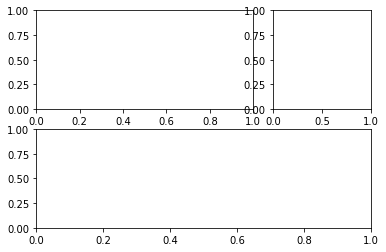

In [275]:
fig = plt.figure()

gs = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, :])

plt.show()

## Edge fitting on a 5x5 roi for Nickel and Iron 

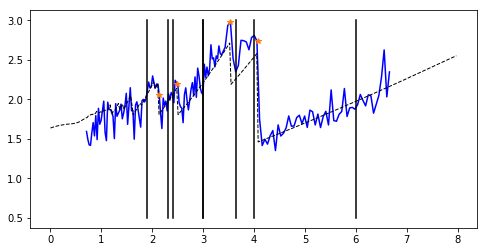

In [12]:
# Ni5x5 and Fe5x5

# # I start with Nichel
# # hkl     multiplicity     d_hkl     |F|^2
#  1  1  1         8       2.035    1610.470
#  2  0  0         6       1.762    1582.482
#  2  2  0        12       1.246    1475.309
#  3  1  1        24       1.063    1399.720
#  2  2  2         8       1.017    1375.395
#  4  0  0         6       0.881    1282.247
#  3  3  1        24       0.808    1216.550
#  4  2  0        24       0.788    1195.407
Ni_4D_av = Ni5x5

lambda_ranges_Ni=np.zeros((4,2))


lambda_ranges_Ni[3,0] = 3.65
lambda_ranges_Ni[3,1] = 6.0

lambda_ranges_Ni[2,0] = 3.0
lambda_ranges_Ni[2,1] = 4.0

lambda_ranges_Ni[1,0] = 2.3
lambda_ranges_Ni[1,1] = 3.0

lambda_ranges_Ni[0,0] = 1.9
lambda_ranges_Ni[0,1] = 2.4


peak_pos_Ni = np.zeros(4)
peak_pos_Ni[0] =  1.063*2
peak_pos_Ni[1] = 1.246*2
peak_pos_Ni[2] = 1.762*2
peak_pos_Ni[3] = 2.035*2

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Ni_4D_av,'b', linewidth=1.5, label='Ni')
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
for i in range(0,4):
    plt.plot((lambda_ranges_Ni[i,0], lambda_ranges_Ni[i,0]),(0.5,3.0), 'k-')
    plt.plot((lambda_ranges_Ni[i,1], lambda_ranges_Ni[i,1]),(0.5,3.0), 'k-')
    plt.plot(peak_pos_Ni[i],Ni_4D_av[TOF_routines.find_nearest(peak_pos_Ni[i], lambda_bin)],'C1*')

[1.9 2.4]
[45 64]
0
Parameters([('t0', <Parameter 't0', 2.1432649333707947, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.0011695750179746753, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.015187691396940137, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -1.3582606024299957, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 1.449239341420746, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', 1.7944495181456486, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 0.1950710750410799, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 20
    # data points      = 19
    # variables        = 7
    chi-square         = 0.10557251
    reduced chi-square = 0.00879771
    Akaike info crit   = -84.6631293
    Bayesian info crit = -78.0520565
[[Variables]]
    t0:                 2.14372956 +/- 0.01062964 (0.50%) (ini

C:\Users\carminati_c\git\scripts\python\ToF_notebooks\AdvancedBraggEdgeFitting_v2.py:67: RuntimeWarning: invalid value encountered in add
  return line_after(t,a1,a2)*B(t,t0,alpha,sigma,bool_transmission)+line_before(t,a5,a6)*(1-B(t,t0,alpha,sigma,bool_transmission))


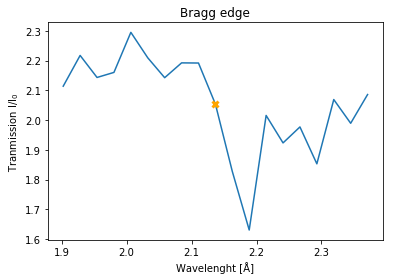

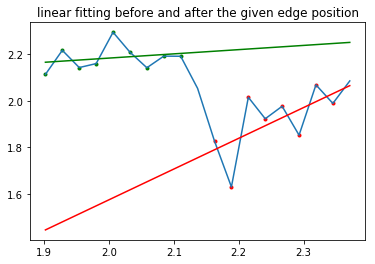

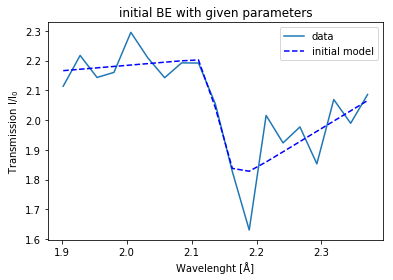

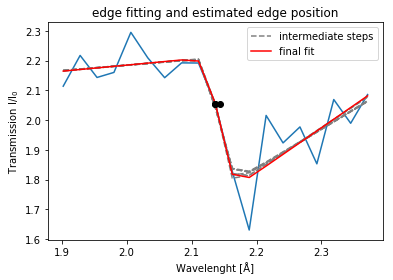

[2.3 3. ]
[60 87]
0
Parameters([('t0', <Parameter 't0', 2.5148168208186457, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.00838527524417445, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.011166203995632892, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -0.4103286158889006, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.8966945389321787, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -1.503208216231206, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 1.493753845552581, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])


C:\Users\carminati_c\git\scripts\python\ToF_notebooks\AdvancedBraggEdgeFitting_v2.py:59: RuntimeWarning: invalid value encountered in multiply
  edge = 0.5*(term3(t,t0,sigma) - term4(t,t0,alpha,sigma)* term5(t,t0,alpha,sigma))


[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 462
    # data points      = 27
    # variables        = 7
    chi-square         = 0.32360049
    reduced chi-square = 0.01618002
    Akaike info crit   = -105.450226
    Bayesian info crit = -96.3793678
[[Variables]]
    t0:                 2.51485947 +/- 1.08575055 (43.17%) (init = 2.514817)
    alpha:              0.00824173 +/- 0.57174146 (6937.15%) (init = 0.008385275)
    sigma:              0.01098619 +/- 0.64500575 (5871.06%) (init = 0.0111662)
    a1:                -0.39318191 +/- 0.80695607 (205.24%) (init = -0.4103286)
    a2:                 0.89065046 +/- 0.28935774 (32.49%) (init = 0.8966945)
    a5:                -1.48009413 +/- 1.82122088 (123.05%) (init = -1.503208)
    a6:                 1.48384837 +/- 0.76400496 (51.49%) (init = 1.493754)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(t0, alpha) 

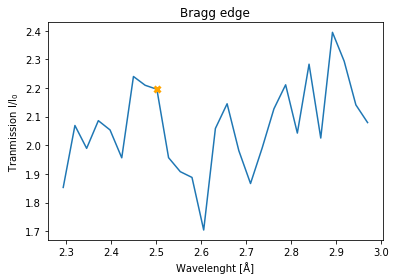

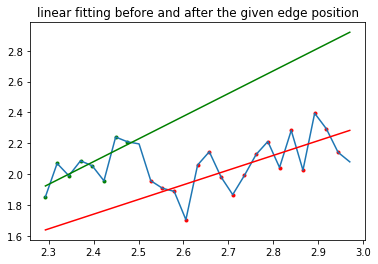

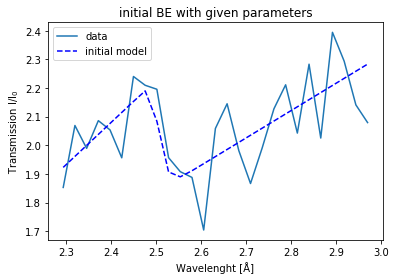

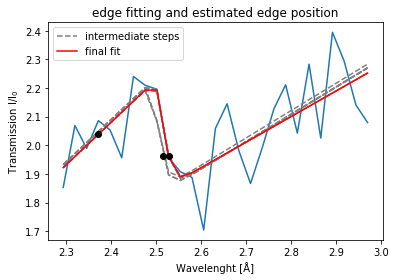

[3. 4.]
[ 87 113]
0
Parameters([('t0', <Parameter 't0', 3.582902891548459, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.0018218284938843823, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.0027322153425117244, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -1.1375706277124442, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.9944886598687961, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -1.3397726328084145, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 1.1972074427573793, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 26
    # variables        = 7
    chi-square         = 0.29111468
    reduced chi-square = 0.01532183
    Akaike info crit   = -102.795498
    Bayesian info crit = -93.9888226
##  Warning: uncertainties could not be estimated:
    bool_transmission: 

C:\ProgramData\Anaconda3\lib\site-packages\lmfit\minimizer.py:779: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
C:\ProgramData\Anaconda3\lib\site-packages\lmfit\minimizer.py:772: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


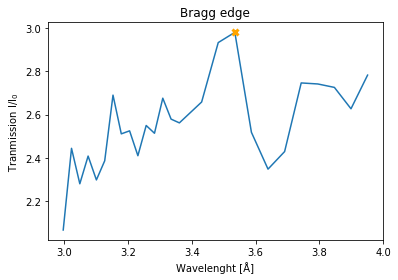

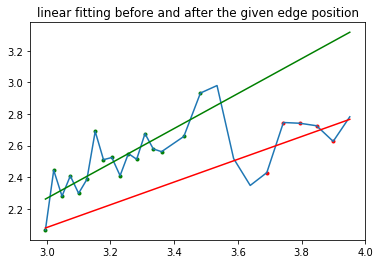

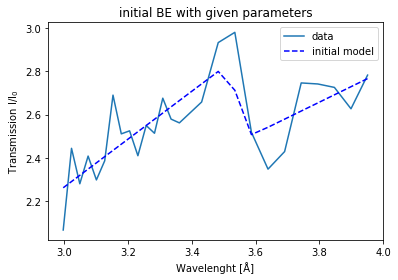

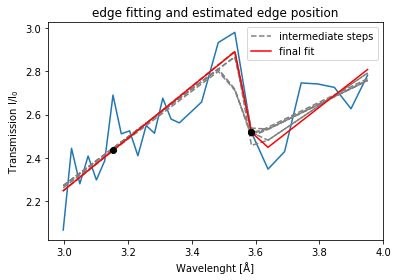

[3.65 6.  ]
[106 151]
0
Parameters([('t0', <Parameter 't0', 4.0845131559573655, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.0025137706163820906, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.024682583828271994, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', 0.48937512620017565, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.2437304206427169, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -1.5349141110677529, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 1.0960433648415395, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 19
    # data points      = 45
    # variables        = 7
    chi-square         = 0.49422054
    reduced chi-square = 0.01300580
    Akaike info crit   = -189.014616
    Bayesian info crit = -176.367978
##  Warning: uncertainties could not be estimated:
    bool_transmissi

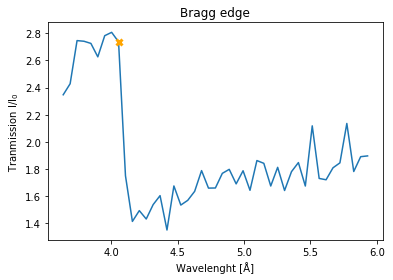

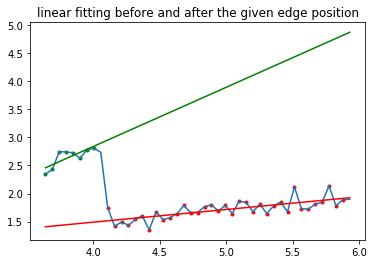

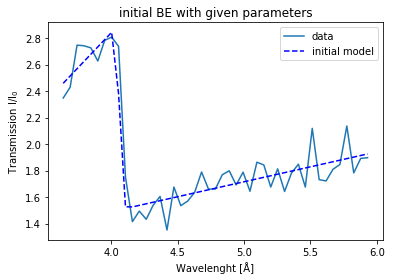

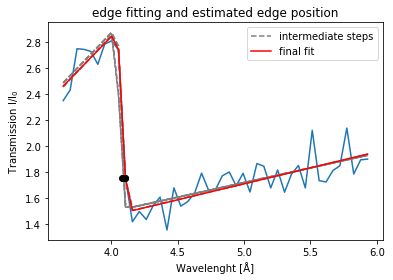

In [13]:

est_sigma = 0.01
est_alpha = np.array([0.01,0.01,0.01,0.01,0.01,0.15])
results_Ni =[]
original_Ni =[]
for i in range(0, len(peak_pos_Ni)):
# for i in range(len(peaks)-6, len(peaks)-5):
    
    print(lambda_ranges_Ni[i,:])
    myrange = np.array([TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,0]), TOF_routines.find_nearest(lambda_bin,lambda_ranges_Ni[i,1])])
    print(myrange)
    est_peak = TOF_routines.find_nearest(lambda_bin,peak_pos_Ni[i])

    curr_res = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(Ni_4D_av, myrange, lambda_bin, est_peak, est_sigma, est_alpha[i], False, False, True, 0)
    results_Ni.append(curr_res)
    original_Ni.append(Ni_4D_av[myrange[0]:myrange[1]])

In [14]:
print(results_Ni[0]['fitted_data'])
print(original_Ni[0])

[2.16499805 2.17035062 2.17570464 2.18105722 2.18640979 2.19176381
 2.19711637 2.20242546 2.19880107 2.05498963 1.81807874 1.80704925
 1.84556034 1.8849211  1.924283   1.96365557 2.00301747 2.04239004
 2.08175194]
[2.11419177 2.21765733 2.14355445 2.16056228 2.29535556 2.20967031
 2.1427598  2.19263721 2.19210696 2.05398989 1.82735741 1.63035572
 2.01577759 1.92339754 1.97712278 1.8529892  2.06927443 1.98943472
 2.08612919]


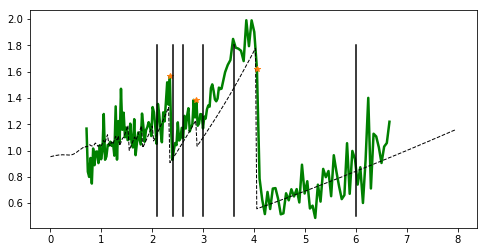

In [15]:
# I try also with Iron
# # hkl     multiplicity     d_hkl     |F|^2
#  1  1  0        12       2.027     344.177
#  2  0  0         6       1.433     331.620
#  2  1  1        24       1.170     319.521
#  2  2  0        12       1.013     307.863
#  3  1  0        24       0.906     296.631
#  2  2  2         8       0.827     285.809

Fe_4D_av = Fe5x5
lambda_ranges_Fe=np.zeros((3,2))


lambda_ranges_Fe[2,0] = 3.0
lambda_ranges_Fe[2,1] = 6.0

lambda_ranges_Fe[1,0] = 2.4
lambda_ranges_Fe[1,1] = 3.6

lambda_ranges_Fe[0,0] = 2.1
lambda_ranges_Fe[0,1] = 2.6


peak_pos_Fe = np.zeros(3)
peak_pos_Fe[0] = 1.170*2
peak_pos_Fe[1] = 1.433*2
peak_pos_Fe[2] = 2.027*2

plt.figure(figsize=(8,4))
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5, label='Fe')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
for i in range(0,3):
    plt.plot((lambda_ranges_Fe[i,0], lambda_ranges_Fe[i,0]),(0.5,1.8), 'k-')
    plt.plot((lambda_ranges_Fe[i,1], lambda_ranges_Fe[i,1]),(0.5,1.8), 'k-')
    plt.plot(peak_pos_Fe[i],Fe_4D_av[TOF_routines.find_nearest(peak_pos_Fe[i], lambda_bin)],'C1*')

[2.1 2.6]
[53 72]
0
Parameters([('t0', <Parameter 't0', 2.3702454208590584, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.0005412897440685444, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.0021165964454168467, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -1.312726265352535, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.9604142758522726, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -1.38748912628963, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 1.213687563350852, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 19
    # data points      = 19
    # variables        = 7
    chi-square         = 0.15565153
    reduced chi-square = 0.01297096
    Akaike info crit   = -77.2869159
    Bayesian info crit = -70.6758430
##  Warning: uncertainties could not be estimated:
    bool_transmission:  at

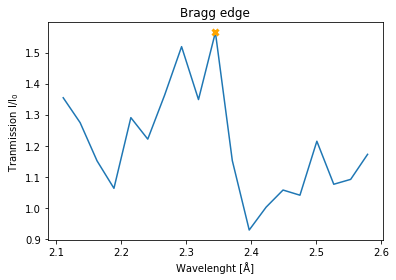

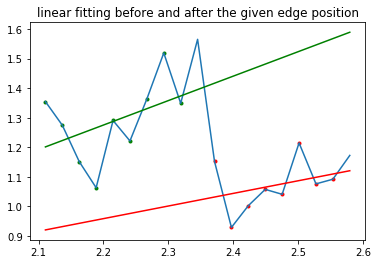

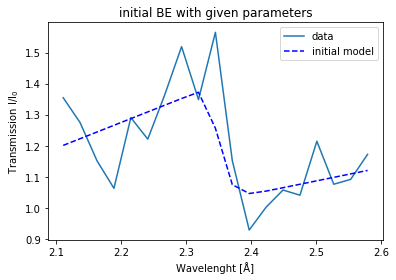

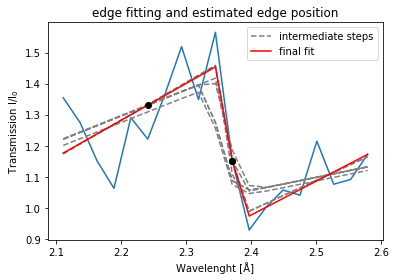

[2.4 3.6]
[ 64 105]
0
Parameters([('t0', <Parameter 't0', 2.865844724600342, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.008048171754751839, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 3.1853269417364333e-06, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', -0.9274173673504441, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.7294665579619817, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -0.6648469624806572, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 0.6974083588301698, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 16
    # data points      = 41
    # variables        = 7
    chi-square         = 0.15114217
    reduced chi-square = 0.00444536
    Akaike info crit   = -215.727364
    Bayesian info crit = -203.732359
[[Variables]]
    t0:                 2.86583078 +/- 123.967245 (4325.70

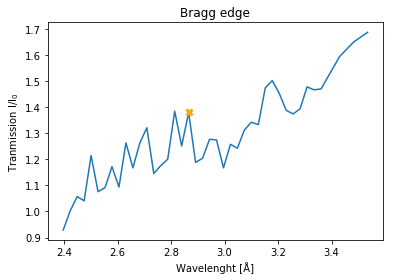

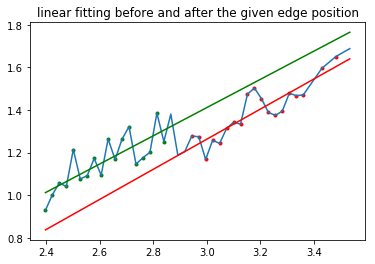

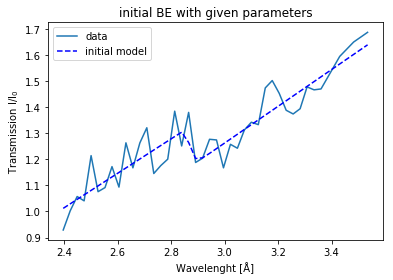

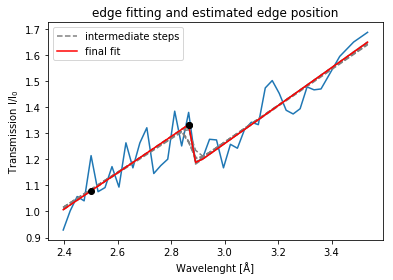

[3. 6.]
[ 87 151]
0
Parameters([('t0', <Parameter 't0', 4.07322296234067, bounds=[-inf:inf]>), ('alpha', <Parameter 'alpha', 0.013486589215956038, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', 0.03157904248566756, bounds=[-inf:inf]>), ('a1', <Parameter 'a1', 0.014948245691004683, bounds=[-inf:inf]>), ('a2', <Parameter 'a2', 0.13553713274702214, bounds=[-inf:inf]>), ('a5', <Parameter 'a5', -0.9182043842564459, bounds=[-inf:inf]>), ('a6', <Parameter 'a6', 0.7255183270479859, bounds=[-inf:inf]>), ('bool_transmission', <Parameter 'bool_transmission', value=-inf (fixed), bounds=[-inf:inf]>)])
[[Model]]
    Model(BraggEdgeLinear)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 20
    # data points      = 64
    # variables        = 7
    chi-square         = 0.61716775
    reduced chi-square = 0.01082750
    Akaike info crit   = -283.055840
    Bayesian info crit = -267.943659
[[Variables]]
    t0:                 4.07318980 +/- 0.01973082 (0.48%) (ini

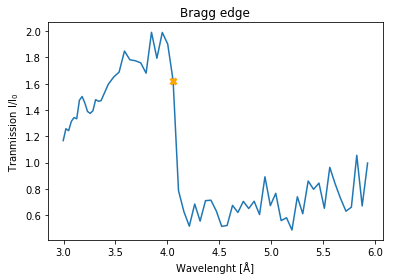

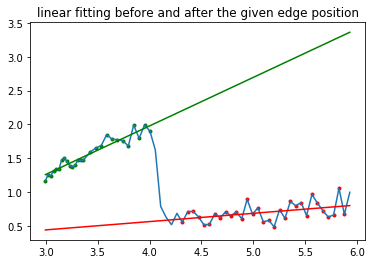

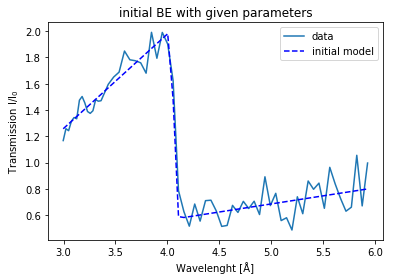

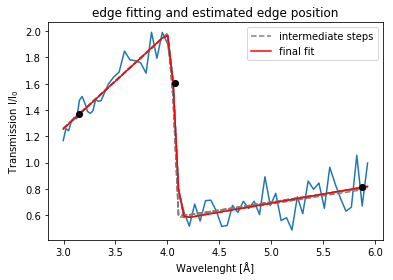

In [17]:
est_sigma = 0.01
est_alpha = np.array([0.01,0.01,0.01,0.01,0.01,0.15])
results_Fe =[]
original_Fe=[]
for i in range(0, len(peak_pos_Fe)):
# for i in range(len(peaks)-6, len(peaks)-5):
    
    print(lambda_ranges_Fe[i,:])
    myrange = np.array([TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,0]), TOF_routines.find_nearest(lambda_bin,lambda_ranges_Fe[i,1])])
    print(myrange)
    est_peak = TOF_routines.find_nearest(lambda_bin,peak_pos_Fe[i])

    curr_res = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(Fe_4D_av, myrange, lambda_bin, est_peak, est_sigma, est_alpha[i], False, False, True, 0)
    results_Fe.append(curr_res)
    original_Fe.append(Fe_4D_av[myrange[0]:myrange[1]])

2.14372956208924
2.5148594729192433
3.5843838018251657
4.085140428377491
-4.008455789517029e-11
2.370378475761775
2.8658307815054958
4.073189799632066
-5.184740247601155e-07


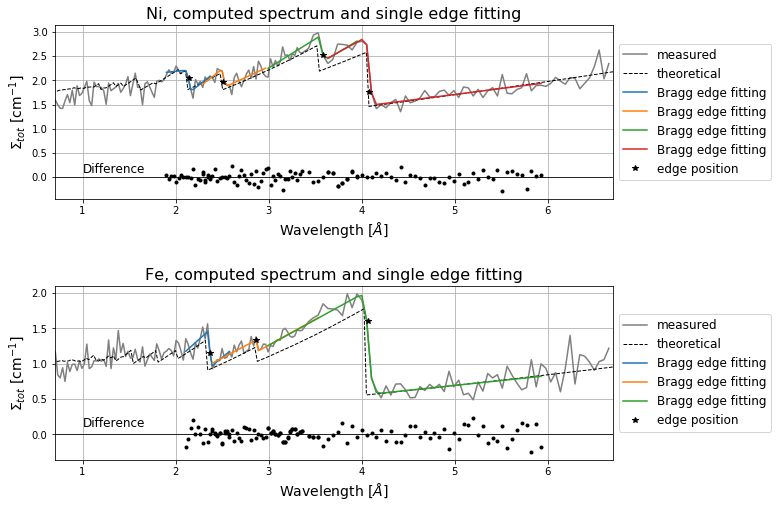

In [19]:
# here I try to make a plot with the fitting overimposed
plt.figure(figsize=(10,8))
ax1 = plt.subplot(211)
plt.plot(lambda_bin, Ni_4D_av,'grey', label='measured')
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical')
# plt.xlim(np.min(lambda_bin),np.max(lambda_bin))
counts =0
mean_difference=np.zeros(4)
for i in range(0,4):
    x_Ni= lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges_Ni[i,1])]
    y_Ni= results_Ni[i]['fitted_data']
    print(results_Ni[i]['t0'])
#     x_edge = lambda_bin[TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    x_edge_Ni = results_Ni[i]['t0']
    y_edge_Ni = y_Ni[TOF_routines.find_nearest(x_Ni,x_edge_Ni)]
#     y_edge = results_Ni[i]['fitted_data'][TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    plt.plot(x_Ni,y_Ni, label='Bragg edge fitting')
    if i==3:
        plt.plot(x_edge_Ni, y_edge_Ni,'*', color='k', label='edge position')
    else:
        plt.plot(x_edge_Ni, y_edge_Ni,'*', color='k')    
    plt.plot(x_Ni, results_Ni[i]['fitted_data']-original_Ni[i], '.k')
    mean_difference = np.average(results_Ni[i]['fitted_data']-original_Ni[i])
#     print('average diff: ', np.average(results_Ni[i]['fitted_data']-original_Ni[i]), results_Ni[i]['fitted_data']-original_Ni[i])

# print(mean_difference)
diff_av = np.average((mean_difference))
print(diff_av)
plt.plot([0.7,6.7],[diff_av, diff_av],'-k', linewidth=0.8)
plt.text(1.0,0.1, 'Difference', fontsize=12)
plt.xlim([0.7,6.7])
plt.grid()
lg1 = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Ni, computed spectrum and single edge fitting', fontsize=16)
plt.xlabel('Wavelength [$\AA$]',fontsize=14)
plt.ylabel('$\Sigma_{tot}$ [cm$^{-1}$]',fontsize=14)

ax2=plt.subplot(212)
plt.plot(lambda_bin, Fe_4D_av, 'grey', label='measured')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1, label='theoretical')
# plt.xlim(np.min(lambda_bin),np.max(lambda_bin))
mean_difference=np.zeros(3)
for i in range(0,3):
    x_Fe= lambda_bin[TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,0]):TOF_routines.find_nearest(lambda_bin, lambda_ranges_Fe[i,1])]
    y_Fe= results_Fe[i]['fitted_data']
    print(results_Fe[i]['t0'])
#     x_edge = lambda_bin[TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    x_edge_Fe = results_Fe[i]['t0']
    y_edge_Fe = y_Fe[TOF_routines.find_nearest(x_Fe,x_edge_Fe)]
#     y_edge = results_Ni[i]['fitted_data'][TOF_routines.find_nearest(lambda_bin,results_Ni[i]['t0'] )]
    plt.plot(x_Fe,y_Fe, label='Bragg edge fitting')
    if i==2:
        plt.plot(x_edge_Fe, y_edge_Fe,'*k', label='edge position')
    else:
        plt.plot(x_edge_Fe, y_edge_Fe,'*k')
    plt.plot(x_Fe, results_Fe[i]['fitted_data']-original_Fe[i], '.k')
    mean_difference = np.average(results_Fe[i]['fitted_data']-original_Fe[i])

diff_av = np.average((mean_difference))
print(diff_av)
plt.plot([0.7,6.7],[diff_av, diff_av],'-k', linewidth=0.8)
plt.text(1.0,0.1, 'Difference', fontsize=12)
plt.xlim([0.7,6.7])
plt.grid()
lg2 = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Fe, computed spectrum and single edge fitting', fontsize=16)
plt.xlabel('Wavelength [$\AA$]',fontsize=14)
plt.ylabel('$\Sigma_{tot}$ [cm$^{-1}$]',fontsize=14)
plt.subplots_adjust(hspace=0.5)


plt.savefig('Figure_edgefitting.pdf',bbox_extra_artists=(lg1,lg2), bbox_inches='tight')

In [192]:
# lattice parameter for Ni and Fe
# NI:
Ni_a = np.zeros(4)
Ni_a[0]=(4.082689604840908/2)*np.sqrt(1+1+1) # h,k,l=1,1,1
Ni_a[1]=(3.5560404510834904/2)*np.sqrt(4+0+0) #h,k,l = 2,0,0
Ni_a[2]=(2.50548262822712/2)*np.sqrt(4+4+0) #h,k,l = 2,2,0
Ni_a[3]=(2.1328077610648157/2)*np.sqrt(9+1+1) # h,k,l = 3,1,1

print(np.average(Ni_a), np.std(Ni_a))

Fe_a = np.zeros(3)
Fe_a[0] = (4.042547707787905/2)*np.sqrt(1+1+0) #h,k,l =1,1,0
Fe_a[1] = (2.86886622442819/2)*np.sqrt(4+0+0) # h,k,l = 2,0,0
Fe_a[2] = (2.354904214093024/2)*np.sqrt(4+1+1) # h,k,l = 2,1,1

print(np.average(Fe_a), np.std(Fe_a))

3.5429756061190827 0.00807644546923401
2.8705119935680075 0.010533584571436482


## 4D data analysis on the reconstructions obtained with corrected background 

In [191]:
%%time
nBins=165 
slice_first =269
slice_end = 509
nSlices = slice_end-slice_first
spectrum_img_BB_4D=np.zeros((476,476,nSlices,nBins))
# spectrum_img_BB_4D =[]
print(np.shape(spectrum_img_BB_4D))
for i in range (0, nBins):
    print('nBin: ....' , i)
    for j in range(slice_first, slice_end):
        filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
#         print(filename)
        spectrum_img_BB_4D[:,:,j-slice_first,i]= io.imread(filename)
#         spectrum_img_BB_4D.append(io.imread(filename))
#     print(filename)

In [190]:
from tempfile import TemporaryFile
fourD_data = TemporaryFile()
np.save('fourD_data_BBconst_dose.npy', spectrum_img_BB_4D)

In [ ]:
# I divide the 4D regions with the different materials

Ti_4D = spectrum_img_BB_4D[150:200,80:130,:,:]
Fe_4D = spectrum_img_BB_4D[300:350, 80:130,:,:]
Cu_4D = spectrum_img_BB_4D[130:180,350:400,:,:]
Ni_4D = spectrum_img_BB_4D[380:430,230:280,:,:]
Pb_4D = spectrum_img_BB_4D[50:100,200:250,:,:]
Al_4D = spectrum_img_BB_4D[280:330, 330:380, :,:]

#     Ti[i] = np.median(spectrum_img[150:200,80:130,i])
#     Pb[i] = np.median(spectrum_img[50:100,200:250,i])
#     Fe[i] = np.median(spectrum_img[300:350, 80:130,i])
#     Cu[i] = np.median(spectrum_img[130:180,350:400,i])
#     Ni[i] = np.median(spectrum_img[380:430,230:280,i])
#     Al[i] = np.median(spectrum_img[280:330,330:380,i])

In [ ]:
nBins = np.shape(spectrum_img_BB_4D)[3]
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)
Al_4D_std = np.zeros(nBins)
Al_4D_av = np.zeros(nBins)


for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,:,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,:,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,:,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,:,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,:,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,:,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,:,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,:,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,:,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,:,i])
    Al_4D_std[i] = np.std(Al_4D[:,:,:,i])
    Al_4D_av[i] = np.mean(Al_4D[:,:,:,i])

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(611)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
# plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.fill_between(lambda_bin, Ni_4D_av-1.96*np.std(Ni_4D_av), Ni_4D_av+1.96*np.std(Ni_4D_av), color='b', alpha=0.2)

plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(612)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
# plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*np.std(Fe_4D_av), Fe_4D_av+1.96*np.std(Fe_4D_av), color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(613)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
# plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*np.std(Ti_4D_av), Ti_4D_av+1.96*(np.std(Ti_4D_av)), color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(614)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
# plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*np.std(Pb_4D_av), Pb_4D_av+1.96*np.std(Pb_4D_av), color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(615)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
# plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*np.std(Cu_4D_av), Cu_4D_av+1.96*np.std(Cu_4D_av), color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplot(616)
plt.plot(lambda_bin, Al_4D_av, 'gray', linewidth=2.5)
# plt.fill_between(lambda_bin, Al_4D_av-1.96*Al_4D_std, Al_4D_av+1.96*Al_4D_std, color='gray', alpha=0.2)
plt.fill_between(lambda_bin, Al_4D_av-1.96*np.std(Al_4D_av), Al_4D_av+1.96*np.std(Al_4D_av), color='gray', alpha=0.2)

plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Al')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# plt.tight_layout()
plt.savefig('4D_spectra.png', dpi=900)
# plt.savefig('4D_spectra.pdf')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 50
# for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
#     ys = np.random.normal(loc=10, scale=10, size=2000)

#     hist, bins = np.histogram(ys, bins=nbins)
#     xs = (bins[:-1] + bins[1:])/2

#     ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

for i in range(0,nBins):
    hist, bins = np.histogram(Ni_4D[:,:,:,i], bins=nbins)
    xs = (bins[:-1] + bins[1:])/2
    z= i

    ax.bar(xs, hist, zs=z,color='none', edgecolor='b', zdir='y', alpha=0.6)
    
ax.set_xlabel('Value')
ax.set_ylabel('Bin')
ax.set_zlabel('Counts')

plt.show()
